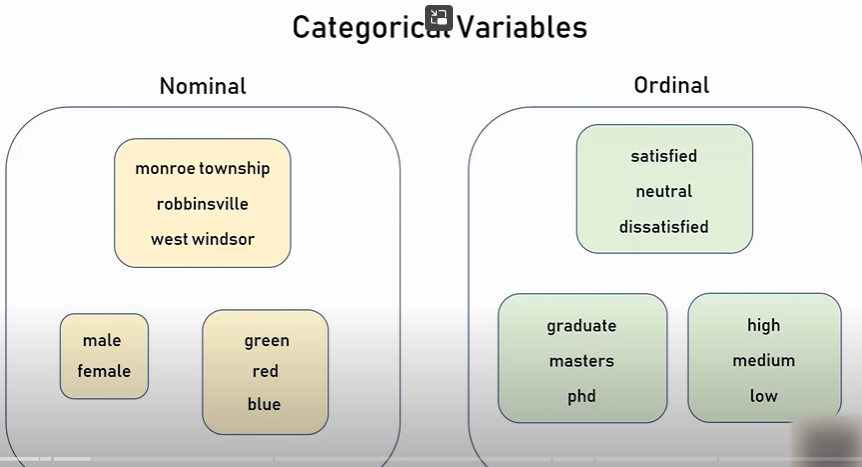

In [1]:

import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv("homeprices.csv")
df

Using pandas to create dummy variables for nominal category

In [ ]:
dummies = pd.get_dummies(df.town)
dummies

In [ ]:
merged = pd.concat([df,dummies],axis='columns')
merged

In [ ]:
final = merged.drop(['town'], axis='columns')

Dummy Variable Trap
When you can derive one variable from other variables, they are known to be multi-colinear. Here if you know values of california and georgia then you can easily infer value of new jersey state, i.e. california=0 and georgia=0. There for these state variables are called to be multi-colinear. In this situation linear regression won't work as expected. Hence you need to drop one column.

NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the state columns it is going to work, however we should make a habit of taking care of dummy variable trap ourselves just in case library that you are using is not handling this for you

In [ ]:
final = final.drop(['west windsor'], axis='columns')
final

In [ ]:
X = final.drop('price', axis='columns')
X

In [ ]:

y = final.price

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X,y)

In [ ]:

model.predict(X) # 2600 sqr ft home in new jersey

In [ ]:
def score(self, X, y):
        y_pred = self.predict(X)
        y_mean = np.mean(y)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - y_mean) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        return r2

In [ ]:

model.score(X,y) #Returns the mean accuracy or R-squared value of the model on the given data.

*  monroe township>> [1,0]
* robinsville>> [0,1]
* west windsor>> [0,0]

In [ ]:
inputx = [3400,'robinsville']

In [ ]:

model.predict([[3400,0,0]]) # 3400 sqr ft home in west windsor


First step is to use label encoder to convert town names into numbers

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
dfle = df
dfle.town = df.fit_transform(dfle.town)
dfle

In [ ]:

X = dfle[['town','area']].values

In [ ]:

y = dfle.price.values

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ColumnTransformer: Class that applies transformations to columns.
('town', OneHotEncoder(), [0]): Tuple specifying the transformation.
town: Name of the transformation.
OneHotEncoder(): Transformation to apply (one-hot encoding).
[0]: Index(es) of the column(s) to apply the transformation to.e remainder='passthrough' argument means that columns not specified in the transformations will be passed through unchanged.

In [ ]:
ct = ColumnTransformer([('town',OneHotEncoder(),[0])], remainder='passthrough')

In [ ]:
x = ct.fit_transform(x)

In [ ]:
X = X[:,1:] # drop first one columns(monre) from onehotencoding

In [ ]:
model.fit(X,y)

In [ ]:
model.predict([[0,1,3400]]) # 3400 sqr ft home in west windsor

In [ ]:

model.predict([[1,0,2800]]) # 2800 sqr ft home in robbinsville

We will use sklearn train_test_split method to split training and testing dataset

Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)

The approach we are going to use here is to split available data in two sets

Training: We will train our model on this dataset
Testing: We will use this subset to make actual predictions using trained model

The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)  # it randomly choose data sample for every iteration

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10) # random size keep same data set for every iteration

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

random_state argument

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_test